In [89]:
import pandas as pd
import os 
import numpy as np
import seaborn as sns
os.chdir("/home/abhisek/Studies/Python program/Data Kaggle/Practice/Data")

In [92]:
df=pd.read_csv("tips.csv")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [93]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

<AxesSubplot:xlabel='smoker', ylabel='count'>

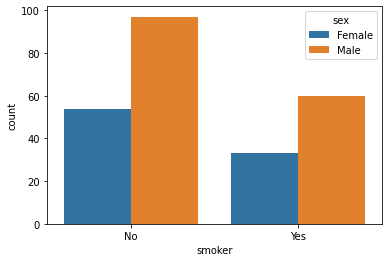

In [17]:
sns.countplot(x="smoker",hue="sex",data=df)

/home/abhisek/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day', ylabel='count'>

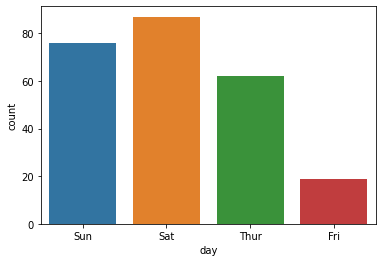

In [18]:
sns.countplot(df["day"])

/home/abhisek/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='time', ylabel='count'>

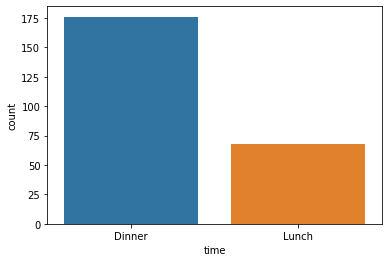

In [30]:
sns.countplot(df["time"])

In [19]:
lst_sex=df["sex"].value_counts().head(1).index
lst_sex=list(lst_sex)
lst_sex

['Male']

In [20]:
for Sex in lst_sex:
    df[Sex]=np.where(df["sex"]==Sex,1,0)

In [21]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,Male
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0


In [22]:
lst_smoker=df["smoker"].value_counts().head(1).index
lst_smoker=list(lst_smoker)
lst_smoker

['No']

In [23]:
for Smoker in lst_smoker:
    df[Smoker]=np.where(df["smoker"]==Smoker,1,0)

In [24]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,Male,No
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1


In [27]:
lst_time=df["time"].value_counts().head(1).index
lst_time=list(lst_time)
lst_time

['Dinner']

In [28]:
for Time in lst_time:
    df[Time]=np.where(df["time"]==Time,1,0)

In [29]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,Male,No,Dinner
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1,1


In [31]:
X=df.iloc[:,[0,6,7,8,9]]
X.head()

,total_bill,size,Male,No,Dinner
0,16.99,2,0,1,1
1,10.34,3,1,1,1
2,21.01,3,1,1,1
3,23.68,2,1,1,1
4,24.59,4,0,1,1


<AxesSubplot:>

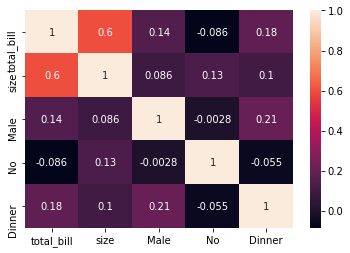

In [32]:
sns.heatmap(X.corr(),annot=True)

In [33]:
y=df.iloc[:,[1]]
y.head()

,tip
0,1.01
1,1.66
2,3.50
3,3.31
4,3.61


In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=100)
print("X_train_Shape",X_train.shape)
print("X_test_Shape",X_test.shape)

X_train_Shape (195, 5)
X_test_Shape (49, 5)


## Linear Regg

In [81]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression(normalize=False)
lin_model.fit(X_train,y_train)

LinearRegression()

In [82]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [83]:
#for train
y_linpredtrain=lin_model.predict(X_train)
print ("mean_sq error train", np.sqrt(mean_squared_error(y_train,y_linpredtrain)))
print ("r2train",r2_score(y_train,y_linpredtrain))
((y_train-y_linpredtrain)**2).sum()

mean_sq error train 0.9838477184159717
r2train 0.420867495054006


tip    188.751485
dtype: float64

In [55]:
##print ("r2 for train",lin_model.score(X_train,y_train))
##print ("r2 for test",lin_model.score(X_test,y_test))

In [85]:
# for test
y_linpredtest=lin_model.predict(X_test)
print ("mean_sq error test", np.sqrt(mean_squared_error(y_test,y_linpredtest)))
print ("r2 test",r2_score(y_test,y_linpredtest))

mean_sq error test 1.136708237489113
r2 test 0.5184101763591895


## Ridge Regg

In [86]:
from sklearn.linear_model import Ridge
rid_model=Ridge(alpha=0.01)
rid_model.fit(X_train,y_train)

Ridge(alpha=0.01)

In [87]:
# for train
y_ridpredtrain=rid_model.predict(X_train)
print("Mean sq error",np.sqrt(mean_squared_error(y_train,y_ridpredtrain)))
print("R2 train",r2_score(y_train,y_ridpredtrain))

Mean sq error 0.9838477187364987
R2 train 0.42086749467665585


In [88]:
#for test
y_ridpredtest=rid_model.predict(X_test)
print("Mean sq error test",np.sqrt(mean_squared_error(y_test,y_ridpredtest)))
print("R2 test",r2_score(y_test,y_ridpredtest))

Mean sq error test 1.136697376171222
R2 test 0.5184193795566421
